In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm

%matplotlib inline

# Загружаем выборку Diamonds

1. PRICE: price in US dollars (326-18,823)
2. CARAT: weight of the diamond (0.2--5.01)
3. CUT: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
4. COLOR: diamond colour, from J (worst) to D (best)
5. CLARITY: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
6. X: length in mm (0--10.74)
7. Y: width in mm (0--58.9)
8. Z: depth in mm (0--31.8)
9. DEPTH: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
10. TABLE: width of top of diamond relative to widest point (43--95)

In [2]:
diamonds_df = pd.read_csv('diamonds.csv')

In [3]:
diamonds_df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


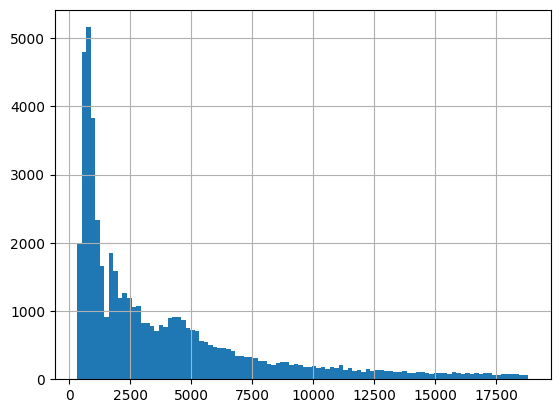

In [4]:
plt.hist(diamonds_df['price'], bins=100)
plt.grid();

# Подготовка данных

In [5]:
features = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']
target = ['price']

In [6]:
cut_transform = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
clarity_transform = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}
color_transorm = {'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4, 'I': 5, 'J': 6}

In [7]:
diamonds_df['cut'] = diamonds_df['cut'].apply(lambda x: cut_transform.get(x))
diamonds_df['color'] = diamonds_df['color'].apply(lambda x: color_transorm.get(x))
diamonds_df['clarity'] = diamonds_df['clarity'].apply(lambda x: clarity_transform.get(x))

In [8]:
X = diamonds_df[features].copy().values
y = diamonds_df[target].values

In [9]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47, test_size=0.3)

# Обучаем модель линейной регрессии

In [11]:
reg = LinearRegression().fit(X_train, y_train)

In [12]:
y_pred = reg.predict(X_test)

In [13]:
score = r2_score(y_pred, y_test)

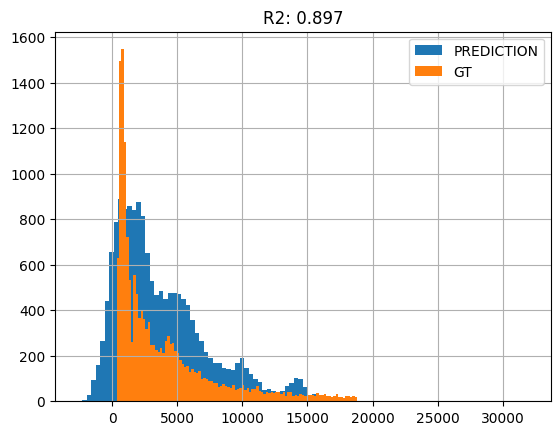

In [14]:
plt.title(f'R2: {str(score)[:5]}')
plt.hist(y_pred.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.hist(y_test.reshape(1, -1)[0], bins=100, label='GT')
plt.legend()
plt.grid();

In [15]:
X_train

array([[0.05197505, 0.75      , 0.83333333, ..., 0.45623836, 0.08285229,
        0.09685535],
       [0.31185031, 1.        , 0.33333333, ..., 0.7122905 , 0.12852292,
        0.14937107],
       [0.07068607, 1.        , 0.16666667, ..., 0.49068901, 0.08981324,
        0.10062893],
       ...,
       [0.07276507, 0.5       , 0.33333333, ..., 0.49255121, 0.09032258,
        0.10125786],
       [0.07068607, 1.        , 0.33333333, ..., 0.49068901, 0.08913413,
        0.10125786],
       [0.03950104, 0.75      , 0.5       , ..., 0.44134078, 0.07962649,
        0.09025157]])

# Создаём модель MLP для задачи регрессии

Для удобства создаём слои в виде классов

In [16]:
class LinearLayer:
    def __init__(self, input_size, output_size):
        self.w = np.random.randn(input_size, output_size) * np.sqrt(2. / input_size)
        self.b = np.zeros(output_size)
        self.result = 0

    def forward(self, x):
        self.result = x.dot(self.w) + self.b
        return self.result

    def getWeights(self):
        return self.w

    def getBias(self):
        return self.b

    def setWeights(self, weights):
        self.w = weights

    def setBias(self, bias):
        self.b = bias

    def getResult(self):
        return self.result


### Функция активации - сигмоида

In [17]:
class SigmoidLayer:
    def __init__(self):
        self.result = 0

    def forward(self, x):
        self.result = 1 / (1 + np.exp(-x))
        return self.result

    def derivative(self):
        return self.result * (1 - self.result)

    def getResult(self):
        return self.result

def sigmoid_derivative(X):
    return X * (1 - X)


### Функция активации - ReLU

In [18]:
class ReLULayer:
    def __init__(self):
        self.result = 0
        
    def forward(self, x):
        self.result = np.maximum(0, x)
        return self.result
    
    def derivative(self, x):
        return np.where(x > 0, 1, 0)
    
    def getResult(self):
        return self.result
    

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

### Построение Модели

Данная модель может иметь сколько угодно скрытых слоев, при условии, что все слои будут линейными и после каждого будет функция активации

In [19]:
class MLPRegressor:
    
    def __init__(self, input_shape=9, hidden_layer_sizes=(100,), learning_rate=0.001, max_iter=10, batch_size = 100, activation = "relu"):
         
        if activation == "relu":
            self.activation = ReLULayer
            self.derivative = relu_derivative
        elif activation == "sigmoid":  # В данном случае сигмоида сработала очень плохо, но по тому же принципу можно использовать другие функции активации, логика модели останется такой же
            self.activation = SigmoidLayer
            self.derivative = sigmoid_derivative
        
        self.layers = [
            LinearLayer(input_shape, hidden_layer_sizes[0]),
            self.activation(),
        ]

        for i in range(1, len(hidden_layer_sizes)):
            self.layers.append(LinearLayer(hidden_layer_sizes[i - 1], hidden_layer_sizes[i]))
            self.layers.append(self.activation())

        self.layers.append(LinearLayer(hidden_layer_sizes[-1], 1))

        self.lr = learning_rate
        self.max_iter = max_iter
        self.batch_size = batch_size
        

    def train(self, X, y):
        
        for epoch in range(1, self.max_iter + 1):
            batches_X = [X[j:j + self.batch_size] for j in range(0, len(X), self.batch_size)]
            batches_y = [y[j:j + self.batch_size] for j in range(0, len(y), self.batch_size)]       

            for j in tqdm(range(len(batches_X)), desc=f"Batch processing - Epoch {epoch}"):
                batch = batches_X[j]
                y_b = batches_y[j]
                
                # Воспользуемся тем, что при прямом прогоне слои запоминают внутри себя результат
                y_pred = self.predict(batch)
                
                L = np.mean(1/2 * (y_pred - y_b) ** 2)
                
                # Вычислим градиенты для последнего линейного слоя отдельно
                dL_dy_pred = (y_pred - y_b) / y_b.size
                
                dL_dz = dL_dy_pred
                dL_dw = self.layers[-2].getResult().T.dot(dL_dz)
                dL_db = np.sum(dL_dz, axis=0)
                
                first = [(dL_dw, dL_db)]
                
                # А теперь можем вычеслять остальные градиенты по цепочке
                for i in range(len(self.layers) - 1, 0, -2):
                    dL_da = dL_dz.dot(self.layers[i].getWeights().T)
                    dL_dz = dL_da * self.derivative(self.layers[i-2].getResult())
                    if i == 2:
                        dL_dw = batch.T.dot(dL_dz)
                    else:
                        dL_dw = self.layers[i-3].getResult().T.dot(dL_dz)
                    dL_db = np.sum(dL_dz, axis=0)
                    first.append((dL_dw, dL_db))
                    
                
                
                first.reverse()
                
                
                # Корректируем веса всех линейных слоёв
                k = 0
                for i in range(0, len(self.layers), 2):
                    delta_w = self.lr * first[k][0]
                    delta_b = self.lr * first[k][1]
                    
                    new_w = self.layers[i].getWeights() - delta_w
                    new_b = self.layers[i].getBias() - delta_b
                    
                    self.layers[i].setWeights(new_w)
                    self.layers[i].setBias(new_b)
                    
                    k += 1
            
        
            print(f'epoch: {epoch}, loss: {L:.4f}')
        
        return first
            

            
    def predict(self, X):
        X1 = X.copy()
        for layer in self.layers:
            X1 = layer.forward(X1)
        return X1
    

# Проверяем модель MLP на выборке Diamonds

In [20]:
np.random.seed(25)

model = MLPRegressor(learning_rate=0.00001, max_iter=100, hidden_layer_sizes=(4,))

_ = model.train(X_train, y_train)

Batch processing - Epoch 1: 100%|██████████| 378/378 [00:00<00:00, 37791.93it/s]


epoch: 1, loss: 4829963.0850


Batch processing - Epoch 2: 100%|██████████| 378/378 [00:00<00:00, 41993.03it/s]


epoch: 2, loss: 1339808.9031


Batch processing - Epoch 3: 100%|██████████| 378/378 [00:00<00:00, 42010.84it/s]


epoch: 3, loss: 796639.3981


Batch processing - Epoch 4: 100%|██████████| 378/378 [00:00<00:00, 42005.27it/s]


epoch: 4, loss: 696328.9680


Batch processing - Epoch 5: 100%|██████████| 378/378 [00:00<00:00, 41993.03it/s]


epoch: 5, loss: 689487.9007


Batch processing - Epoch 6: 100%|██████████| 378/378 [00:00<00:00, 34374.32it/s]


epoch: 6, loss: 681880.7369


Batch processing - Epoch 7: 100%|██████████| 378/378 [00:00<00:00, 34348.26it/s]


epoch: 7, loss: 672879.2208


Batch processing - Epoch 8: 100%|██████████| 378/378 [00:00<00:00, 32837.23it/s]


epoch: 8, loss: 665226.0233


Batch processing - Epoch 9: 100%|██████████| 378/378 [00:00<00:00, 31497.90it/s]


epoch: 9, loss: 658212.8700


Batch processing - Epoch 10: 100%|██████████| 378/378 [00:00<00:00, 37802.74it/s]


epoch: 10, loss: 652028.9853


Batch processing - Epoch 11: 100%|██████████| 378/378 [00:00<00:00, 37807.25it/s]


epoch: 11, loss: 646088.9982


Batch processing - Epoch 12: 100%|██████████| 378/378 [00:00<00:00, 37800.04it/s]


epoch: 12, loss: 640757.2075


Batch processing - Epoch 13: 100%|██████████| 378/378 [00:00<00:00, 34356.45it/s]


epoch: 13, loss: 635819.3011


Batch processing - Epoch 14: 100%|██████████| 378/378 [00:00<00:00, 37787.42it/s]


epoch: 14, loss: 631402.0906


Batch processing - Epoch 15: 100%|██████████| 378/378 [00:00<00:00, 41989.70it/s]


epoch: 15, loss: 627242.2715


Batch processing - Epoch 16: 100%|██████████| 378/378 [00:00<00:00, 37807.25it/s]


epoch: 16, loss: 623176.1185


Batch processing - Epoch 17: 100%|██████████| 378/378 [00:00<00:00, 35973.20it/s]


epoch: 17, loss: 619485.3706


Batch processing - Epoch 18: 100%|██████████| 378/378 [00:00<00:00, 37802.74it/s]


epoch: 18, loss: 616190.0033


Batch processing - Epoch 19: 100%|██████████| 378/378 [00:00<00:00, 37803.64it/s]


epoch: 19, loss: 613118.0021


Batch processing - Epoch 20: 100%|██████████| 378/378 [00:00<00:00, 37798.23it/s]


epoch: 20, loss: 610305.6809


Batch processing - Epoch 21: 100%|██████████| 378/378 [00:00<00:00, 31494.77it/s]


epoch: 21, loss: 607581.5895


Batch processing - Epoch 22: 100%|██████████| 378/378 [00:00<00:00, 37808.15it/s]


epoch: 22, loss: 604970.8481


Batch processing - Epoch 23: 100%|██████████| 378/378 [00:00<00:00, 37786.52it/s]


epoch: 23, loss: 602590.1732


Batch processing - Epoch 24: 100%|██████████| 378/378 [00:00<00:00, 37788.32it/s]


epoch: 24, loss: 600477.5649


Batch processing - Epoch 25: 100%|██████████| 378/378 [00:00<00:00, 41999.71it/s]


epoch: 25, loss: 598079.3024


Batch processing - Epoch 26: 100%|██████████| 378/378 [00:00<00:00, 36742.69it/s]


epoch: 26, loss: 595833.9247


Batch processing - Epoch 27: 100%|██████████| 378/378 [00:00<00:00, 37803.64it/s]


epoch: 27, loss: 593408.4721


Batch processing - Epoch 28: 100%|██████████| 378/378 [00:00<00:00, 37799.13it/s]


epoch: 28, loss: 591503.0070


Batch processing - Epoch 29: 100%|██████████| 378/378 [00:00<00:00, 37800.04it/s]


epoch: 29, loss: 589353.7223


Batch processing - Epoch 30: 100%|██████████| 378/378 [00:00<00:00, 37792.83it/s]


epoch: 30, loss: 587223.0329


Batch processing - Epoch 31: 100%|██████████| 378/378 [00:00<00:00, 37788.32it/s]


epoch: 31, loss: 585109.2546


Batch processing - Epoch 32: 100%|██████████| 378/378 [00:00<00:00, 37815.36it/s]


epoch: 32, loss: 582959.8734


Batch processing - Epoch 33: 100%|██████████| 378/378 [00:00<00:00, 37794.63it/s]


epoch: 33, loss: 580905.6731


Batch processing - Epoch 34: 100%|██████████| 378/378 [00:00<00:00, 34352.72it/s]


epoch: 34, loss: 578570.1866


Batch processing - Epoch 35: 100%|██████████| 378/378 [00:00<00:00, 36472.21it/s]


epoch: 35, loss: 576344.3731


Batch processing - Epoch 36: 100%|██████████| 378/378 [00:00<00:00, 37804.54it/s]


epoch: 36, loss: 574131.1955


Batch processing - Epoch 37: 100%|██████████| 378/378 [00:00<00:00, 37800.94it/s]


epoch: 37, loss: 572105.4564


Batch processing - Epoch 38: 100%|██████████| 378/378 [00:00<00:00, 42007.50it/s]


epoch: 38, loss: 569915.5648


Batch processing - Epoch 39: 100%|██████████| 378/378 [00:00<00:00, 29077.96it/s]


epoch: 39, loss: 567745.0352


Batch processing - Epoch 40: 100%|██████████| 378/378 [00:00<00:00, 34378.05it/s]


epoch: 40, loss: 565778.1167


Batch processing - Epoch 41: 100%|██████████| 378/378 [00:00<00:00, 34366.87it/s]


epoch: 41, loss: 563677.0387


Batch processing - Epoch 42: 100%|██████████| 378/378 [00:00<00:00, 37776.62it/s]


epoch: 42, loss: 558600.4743


Batch processing - Epoch 43: 100%|██████████| 378/378 [00:00<00:00, 39733.52it/s]


epoch: 43, loss: 554260.5472


Batch processing - Epoch 44: 100%|██████████| 378/378 [00:00<00:00, 42004.16it/s]


epoch: 44, loss: 550231.2352


Batch processing - Epoch 45: 100%|██████████| 378/378 [00:00<00:00, 37802.74it/s]


epoch: 45, loss: 546203.2371


Batch processing - Epoch 46: 100%|██████████| 378/378 [00:00<00:00, 37803.64it/s]


epoch: 46, loss: 542649.7325


Batch processing - Epoch 47: 100%|██████████| 378/378 [00:00<00:00, 37790.13it/s]


epoch: 47, loss: 538896.0711


Batch processing - Epoch 48: 100%|██████████| 378/378 [00:00<00:00, 42004.16it/s]


epoch: 48, loss: 535479.7375


Batch processing - Epoch 49: 100%|██████████| 378/378 [00:00<00:00, 34342.31it/s]


epoch: 49, loss: 532510.1568


Batch processing - Epoch 50: 100%|██████████| 378/378 [00:00<00:00, 37803.64it/s]


epoch: 50, loss: 529939.3662


Batch processing - Epoch 51: 100%|██████████| 378/378 [00:00<00:00, 31492.90it/s]


epoch: 51, loss: 527049.0881


Batch processing - Epoch 52: 100%|██████████| 378/378 [00:00<00:00, 39746.47it/s]


epoch: 52, loss: 523627.6736


Batch processing - Epoch 53: 100%|██████████| 378/378 [00:00<00:00, 37784.72it/s]


epoch: 53, loss: 520598.6794


Batch processing - Epoch 54: 100%|██████████| 378/378 [00:00<00:00, 41980.80it/s]


epoch: 54, loss: 518572.6151


Batch processing - Epoch 55: 100%|██████████| 378/378 [00:00<00:00, 42006.38it/s]


epoch: 55, loss: 516737.9984


Batch processing - Epoch 56: 100%|██████████| 378/378 [00:00<00:00, 41993.03it/s]


epoch: 56, loss: 515821.6695


Batch processing - Epoch 57: 100%|██████████| 378/378 [00:00<00:00, 42003.04it/s]


epoch: 57, loss: 515266.1144


Batch processing - Epoch 58: 100%|██████████| 378/378 [00:00<00:00, 37802.74it/s]


epoch: 58, loss: 514886.1674


Batch processing - Epoch 59: 100%|██████████| 378/378 [00:00<00:00, 37799.13it/s]


epoch: 59, loss: 514603.1989


Batch processing - Epoch 60: 100%|██████████| 378/378 [00:00<00:00, 34369.11it/s]


epoch: 60, loss: 514348.3560


Batch processing - Epoch 61: 100%|██████████| 378/378 [00:00<00:00, 39767.41it/s]


epoch: 61, loss: 512670.2614


Batch processing - Epoch 62: 100%|██████████| 378/378 [00:00<00:00, 37792.83it/s]


epoch: 62, loss: 510096.6646


Batch processing - Epoch 63: 100%|██████████| 378/378 [00:00<00:00, 37818.97it/s]


epoch: 63, loss: 508100.7958


Batch processing - Epoch 64: 100%|██████████| 378/378 [00:00<00:00, 37799.13it/s]


epoch: 64, loss: 506629.6776


Batch processing - Epoch 65: 100%|██████████| 378/378 [00:00<00:00, 37803.64it/s]


epoch: 65, loss: 505380.2384


Batch processing - Epoch 66: 100%|██████████| 378/378 [00:00<00:00, 37800.94it/s]


epoch: 66, loss: 503906.6563


Batch processing - Epoch 67: 100%|██████████| 378/378 [00:00<00:00, 42005.27it/s]


epoch: 67, loss: 502925.2778


Batch processing - Epoch 68: 100%|██████████| 378/378 [00:00<00:00, 31504.79it/s]


epoch: 68, loss: 501789.7666


Batch processing - Epoch 69: 100%|██████████| 378/378 [00:00<00:00, 34357.94it/s]


epoch: 69, loss: 500974.4285


Batch processing - Epoch 70: 100%|██████████| 378/378 [00:00<00:00, 39771.40it/s]


epoch: 70, loss: 499747.2257


Batch processing - Epoch 71: 100%|██████████| 378/378 [00:00<00:00, 42011.95it/s]


epoch: 71, loss: 498895.4676


Batch processing - Epoch 72: 100%|██████████| 378/378 [00:00<00:00, 37784.72it/s]


epoch: 72, loss: 497925.9062


Batch processing - Epoch 73: 100%|██████████| 378/378 [00:00<00:00, 37816.27it/s]


epoch: 73, loss: 497031.7956


Batch processing - Epoch 74: 100%|██████████| 378/378 [00:00<00:00, 37805.44it/s]


epoch: 74, loss: 496487.9942


Batch processing - Epoch 75: 100%|██████████| 378/378 [00:00<00:00, 41974.13it/s]


epoch: 75, loss: 495627.6355


Batch processing - Epoch 76: 100%|██████████| 378/378 [00:00<00:00, 41986.36it/s]


epoch: 76, loss: 494542.9996


Batch processing - Epoch 77: 100%|██████████| 378/378 [00:00<00:00, 42017.52it/s]


epoch: 77, loss: 493682.8207


Batch processing - Epoch 78: 100%|██████████| 378/378 [00:00<00:00, 37773.02it/s]


epoch: 78, loss: 492445.7331


Batch processing - Epoch 79: 100%|██████████| 378/378 [00:00<00:00, 35960.96it/s]


epoch: 79, loss: 491400.5807


Batch processing - Epoch 80: 100%|██████████| 378/378 [00:00<00:00, 37791.93it/s]


epoch: 80, loss: 490413.1042


Batch processing - Epoch 81: 100%|██████████| 378/378 [00:00<00:00, 41999.71it/s]


epoch: 81, loss: 489458.4186


Batch processing - Epoch 82: 100%|██████████| 378/378 [00:00<00:00, 31502.28it/s]


epoch: 82, loss: 488183.2620


Batch processing - Epoch 83: 100%|██████████| 378/378 [00:00<00:00, 37802.74it/s]


epoch: 83, loss: 487264.9600


Batch processing - Epoch 84: 100%|██████████| 378/378 [00:00<00:00, 37808.15it/s]


epoch: 84, loss: 485900.9146


Batch processing - Epoch 85: 100%|██████████| 378/378 [00:00<00:00, 42007.50it/s]


epoch: 85, loss: 484432.0927


Batch processing - Epoch 86: 100%|██████████| 378/378 [00:00<00:00, 42001.93it/s]


epoch: 86, loss: 483531.1653


Batch processing - Epoch 87: 100%|██████████| 378/378 [00:00<00:00, 37796.43it/s]


epoch: 87, loss: 482708.3479


Batch processing - Epoch 88: 100%|██████████| 378/378 [00:00<00:00, 39735.51it/s]


epoch: 88, loss: 482166.4072


Batch processing - Epoch 89: 100%|██████████| 378/378 [00:00<00:00, 42001.93it/s]


epoch: 89, loss: 481578.0956


Batch processing - Epoch 90: 100%|██████████| 378/378 [00:00<00:00, 37811.76it/s]


epoch: 90, loss: 481291.7135


Batch processing - Epoch 91: 100%|██████████| 378/378 [00:00<00:00, 41999.71it/s]


epoch: 91, loss: 481158.0706


Batch processing - Epoch 92: 100%|██████████| 378/378 [00:00<00:00, 37809.95it/s]


epoch: 92, loss: 480896.2086


Batch processing - Epoch 93: 100%|██████████| 378/378 [00:00<00:00, 37799.13it/s]


epoch: 93, loss: 480706.2976


Batch processing - Epoch 94: 100%|██████████| 378/378 [00:00<00:00, 34354.96it/s]


epoch: 94, loss: 480408.9647


Batch processing - Epoch 95: 100%|██████████| 378/378 [00:00<00:00, 41997.48it/s]


epoch: 95, loss: 480559.5473


Batch processing - Epoch 96: 100%|██████████| 378/378 [00:00<00:00, 37791.03it/s]


epoch: 96, loss: 480376.5827


Batch processing - Epoch 97: 100%|██████████| 378/378 [00:00<00:00, 41986.36it/s]


epoch: 97, loss: 480074.2674


Batch processing - Epoch 98: 100%|██████████| 378/378 [00:00<00:00, 37783.82it/s]


epoch: 98, loss: 479757.2770


Batch processing - Epoch 99: 100%|██████████| 378/378 [00:00<00:00, 41998.59it/s]


epoch: 99, loss: 479546.2668


Batch processing - Epoch 100: 100%|██████████| 378/378 [00:00<00:00, 41991.92it/s]

epoch: 100, loss: 478985.4171


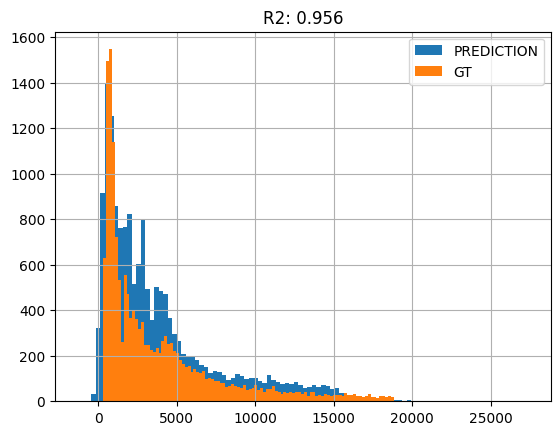

In [21]:
preds = model.predict(X_test)
# Проверяем модель MLP на выборке Diamonds
score_MLP = r2_score(preds, y_test)
plt.title(f'R2: {str(score_MLP)[:5]}')
plt.hist(preds.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.hist(y_test.reshape(1, -1)[0], bins=100, label='GT')
plt.legend()
plt.grid();

Как можно заметить по метрике R2 результат лучше чем от простой модели линейной регрессии. График распределения подтверждает эти результаты.